<h1 style="text-align:center; font-size:200%;">Principal Component Analysis (PCA)</h1>
<h4 style="text-align:left;">Réaliser par : DAGHMOUMI Marouan / BENJELLOUN Abdelmajid </h4>
<h4 style="text-align:left;">Encadrer par : Pr. EN-NAIMI El Mokhtar</h4>

# Table Matière
1. [Présentation Générale du Projet](#presentation-generale-du-projet)
2. [Introduction à PCA](#introduction-a-pca)
   - [Mathématiques liées à PCA](#mathematiques-liees-a-pca)
   - [Machine Learning et PCA](#machine-learning-et-pca)
3. [Introduction des Données](#introduction-des-donnees)
4. [PCA From Scratch](#pca-de-zero)
   - [Méthode de la covariance](#methode-de-la-covariance)
     - [Étape 1: Standardiser les données](#etape-1-standardiser-les-donnees)
     - [Étape 2: Trouver la matrice de covariance](#etape-2-trouver-la-matrice-de-covariance)
     - [Étape 3: Trouver les vecteurs et valeurs propres de la matrice de covariance](#etape-3-trouver-les-vecteurs-et-valeurs-propres-de-la-matrice-de-covariance)
     - [Étape 4: Réorganiser les vecteurs et valeurs propres](#etape-4-reorganiser-les-vecteurs-et-valeurs-propres)
     - [Étape 5: Choisir les composantes principales](#etape-5-choisir-les-composantes-principales)
     - [Étape 6: Projeter les données](#etape-6-projeter-les-donnees)
5. [PCA avec Scikit-Learn](#pca-avec-scikit-learn)
6. [Conclusion](#conclusion)
7. [Références](#references)


# Présentation Générale du Projet
<a id="presentation-generale-du-projet"></a>
Dans ce projet de recherche, nous explorerons l'Analyse en Composantes Principales (PCA) et son application dans l'analyse de données. PCA est une technique fondamentale en statistiques et en apprentissage automatique qui permet de réduire la dimensionnalité des données tout en préservant au mieux leur structure et leur variabilité.

### Objectifs du Projet

L'objectif principal de ce projet est de fournir une compréhension approfondie de PCA, depuis ses concepts théoriques jusqu'à son implémentation pratique. Nous chercherons à répondre aux questions suivantes :

1. Qu'est-ce que PCA et comment fonctionne-t-il ?
2. Quelles sont les applications de PCA dans l'analyse de données ?
3. Comment implémenter PCA en utilisant des bibliothèques comme Scikit-Learn et à partir de zéro en utilisant des concepts mathématiques sous-jacents ?
4. Quels sont les avantages et les limitations de l'utilisation de PCA ?

### Méthodologie

Nous suivrons une approche progressive pour explorer PCA. Nous commencerons par une introduction générale à PCA, où nous décrirons ses principes de base, ses objectifs et ses applications. Ensuite, nous plongerons dans les détails mathématiques sous-jacents de PCA et explorerons sa mise en œuvre pratique en utilisant des bibliothèques comme Scikit-Learn. Enfin, nous explorerons comment implémenter PCA à partir de zéro en utilisant la méthode de la covariance.


À travers ce projet, nous espérons fournir une base solide pour comprendre et utiliser PCA dans divers contextes d'analyse de données et d'apprentissage automatique.


# Introduction de PCA
<a id="introduction-de-pca"></a>
L'Analyse en Composantes Principales (PCA) est une technique fondamentale en statistiques et en apprentissage automatique, largement utilisée pour la réduction de dimensionnalité et l'exploration des données. Elle permet de transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées appelées composantes principales.

<a id="mathematiques-liees-a-pca"></a>
### Mathématiques liées à PCA
Les mathématiques sous-jacentes à PCA reposent principalement sur la décomposition en valeurs singulières (SVD) ou sur la méthode des covariances. La SVD est une méthode couramment utilisée pour calculer les composantes principales et est largement utilisée dans les implémentations de PCA. Elle permet de décomposer une matrice en trois matrices orthogonales, révélant ainsi la structure de variance maximale des données. D'autre part, la méthode des covariances consiste à calculer la matrice de covariance des données d'origine, suivie du calcul des vecteurs et des valeurs propres de cette matrice. Ces vecteurs propres représentent les directions principales de variation dans les données.
<a id="machine-learning-et-pca"></a>
### Machine Learning et PCA
PCA est largement utilisée dans le domaine de l'apprentissage automatique pour plusieurs tâches, notamment :

- **Réduction de Dimensionnalité** : PCA peut être utilisée pour réduire la dimensionnalité des données en éliminant les dimensions peu importantes tout en préservant la variance maximale.
- **Prétraitement des Données** : PCA peut servir de prétraitement des données pour améliorer les performances des modèles d'apprentissage automatique en réduisant la redondance et le bruit dans les données.
- **Visualisation des Données** : PCA peut être utilisée pour visualiser des données à haute dimensionnalité en les projetant dans un espace de dimension réduite, facilitant ainsi leur interprétation visuelle.

# Introduction des Données
<a id="introduction-des-donnees"></a>

Dans ce projet, nous utilisons le jeu de données iris. Ce jeu de données est largement utilisé comme exemple dans l'exploration des données et l'apprentissage automatique. Il se compose de 50 échantillons de chacune des trois espèces d'Iris (Setosa, Versicolor et Virginica). Les lignes représentent les échantillons et les colonnes représentent les caractéristiques suivantes :
- Longueur du Sépale (Sepal Length)
- Largeur du Sépale (Sepal Width)
- Longueur du Pétale (Petal Length)
- Largeur du Pétale (Petal Width)


In [7]:
# Importation des bibliothèques
import pandas as pd  
from sklearn.datasets import load_iris  

# Charger données iris
iris = load_iris()
X = iris['data']  
y = iris['target']  
feature_names = iris['feature_names']  

# Créer un DataFrame
iris_df = pd.DataFrame(X, columns=feature_names)  
iris_df['Target'] = y 

# Afficher le DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# Obtenir le nombre d'échantillons (observations) et le nombre de caractéristiques (features) dans X
n_samples, n_features = X.shape

# Afficher le nombre d'échantillons et le nombre de caractéristiques
print('Nombre d\'échantillons :', n_samples)
print('Nombre de caractéristiques :', n_features)


Nombre d'échantillons : 150
Nombre de caractéristiques : 4


##### Pour avoir une idée de la relation entre les caractéristiques (variables indépendantes), visualisons-les à l'aide d'histogrammes et de graphiques de dispersion.

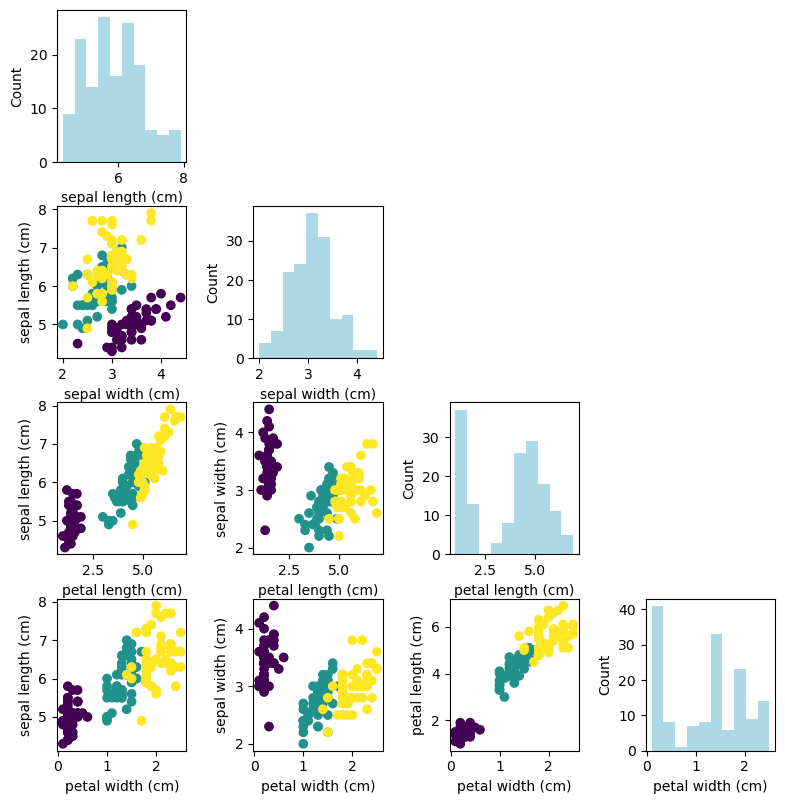

In [12]:
# Importation des bibliothèques 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline  

# Création d'une figure avec une grille de sous-graphiques
fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8)) 
fig.tight_layout()

names = iris.feature_names

# Boucle sur les indices supérieurs de la matrice pour créer les scatter plots
for i, j in zip(*np.triu_indices_from(ax, k=1)):  # np.triu_indices_from retourne les indices supérieurs de la matrice
    ax[j, i].scatter(X[:, j], X[:, i], c=y)  # Affiche un scatter plot entre les caractéristiques i et j, avec les couleurs basées sur les étiquettes y
    ax[j, i].set_xlabel(names[j])  # Ajoute un label sur l'axe x
    ax[j, i].set_ylabel(names[i])  # Ajoute un label sur l'axe y
    ax[i, j].set_axis_off()  # Désactive les axes pour les cellules de la matrice qui ne contiennent pas de graphique

# Boucle sur les indices diagonaux pour créer les histogrammes
for i in range(n_features):
    ax[i, i].hist(X[:, i], color='lightblue')  
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i]) 


# PCA From Scratch
<a id="pca-de-zero"></a>

Dans cette section, nous allons implémenter l'Analyse en Composantes Principales (PCA) à partir de zéro en utilisant la méthode de la covariance. Cette approche nous permettra de mieux comprendre les concepts mathématiques sous-jacents à PCA et son fonctionnement.


### Étape 1 : Standardisation des données
<a id="etape-1-standardiser-les-donnee"></a>
La standardisation des données consiste à transformer chaque variable de manière à ce qu'elle ait une moyenne nulle et une variance unitaire. Mathématiquement, cela peut être exprimé comme suit :

1. **Calcul de la moyenne** (moyenne) :
   
   $$ \text{mean}(x) = \frac{\sum_{i=1}^{n} x_i}{n} $$

2. **Calcul de l'écart type** (std) :

   $$ \text{std}(x) = \left( \frac{\sum_{i=1}^{n} (x_i - \text{mean}(x))^2}{n} \right)^{0.5} $$

3. **Standardisation des données** :

   Pour chaque valeur $x_i$ dans l'ensemble de données $X$ :
   
   $$ X_{\text{std}} = \frac{(X - \text{mean}(X))}{\text{std}(X)} $$

In [13]:
def mean(x):  # fonction pour calculer la moyenne d'
    
    return sum(x) / len(x)  # Retourne la somme des valeurs divisée par le nombre total de valeurs

def std(x):  # fonction pour calculer l'écart type 
    
    return (sum((i - mean(x)) ** 2 for i in x) / len(x)) ** 0.5  # Retourne la racine carrée de la moyenne des carrés des écarts à la moyenne

def Standardize_data(X):  # fonction pour standardiser les données
    
    return (X - mean(X)) / std(X)  # Retourne les données standardisées en soustrayant la moyenne et en divisant par l'écart type

X_std = Standardize_data(X)  # Appel de la fonction Standardize_data pour standardiser les données X

### Étape 2: Calcul de la matrice de covariance
<a id="etape-2-trouver-la-matrice-de-covariance"></a>
La matrice de covariance des données standardisées peut être calculée comme suit.

La formule mathématique pour calculer la matrice de covariance est :

$$ \text{cov}(X) = \frac{X^T \cdot X}{n - 1} $$

où:
- $X$ est la matrice des données standardisées
- $X^T$ est la transposée de la matrice $X$
- $n$ est le nombre d'échantillons dans les données


In [17]:
def covariance(x):
    
    return (x.T @ x) / (x.shape[0] - 1)  # Retourne la matrice de covariance des données standardisées

cov_mat = covariance(X_std)  # Appel de la fonction covariance pour calculer la matrice de covariance des données standardisées
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

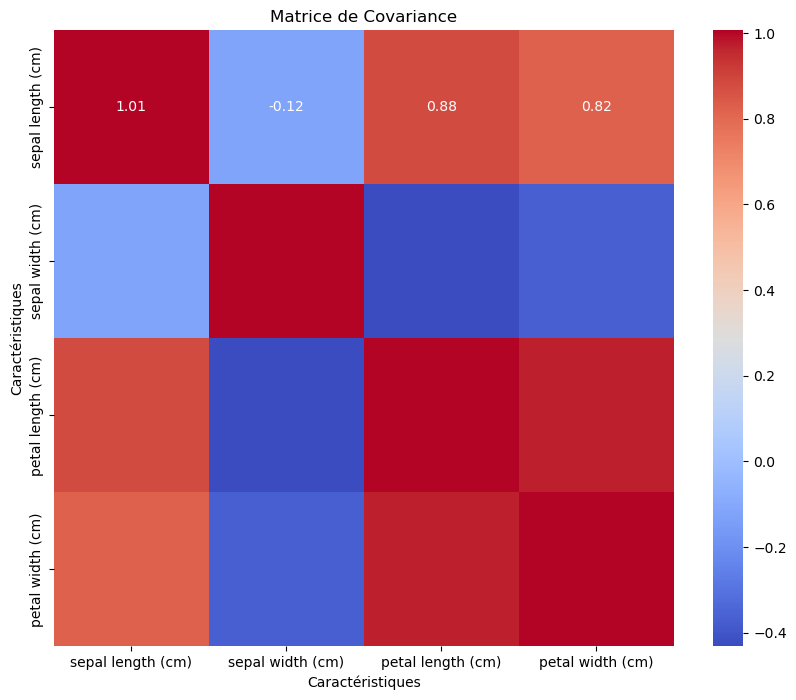

In [20]:
# Visualisation de la matrice de covariance sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=feature_names, yticklabels=feature_names)
plt.title("Matrice de Covariance")
plt.xlabel("Caractéristiques")
plt.ylabel("Caractéristiques")
plt.show()

### Étape 3: Calcul des vecteurs propres et des valeurs propres de la matrice de covariance
<a id="etape-3-trouver-les-vecteurs-et-valeurs-propres-de-la-matrice-de-covariance"></a>
La décomposition en vecteurs propres et valeurs propres de la matrice de covariance est une étape cruciale de l'Analyse en Composantes Principales (PCA).

#### Relation mathématique :

La décomposition en vecteurs propres et valeurs propres de la matrice de covariance est donnée par la formule suivante :

$$ \text{cov}(X) \cdot v = \lambda \cdot v $$

où :
- $\text{cov}(X)$ est la matrice de covariance
- $v$ est le vecteur propre
- $\lambda$ est la valeur propre associée


In [21]:
from numpy.linalg import eig  # Importation de la fonction eig pour la décomposition en vecteurs propres et valeurs propres

# Décomposition en vecteurs propres et valeurs propres de la matrice de covariance
eig_vals, eig_vecs = eig(cov_mat) 

# Ajustement des vecteurs propres pour que les valeurs absolues les plus grandes soient positives
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs * signs[np.newaxis, :]
eig_vecs = eig_vecs.T

# Affichage des valeurs propres et vecteurs propres
print('Valeurs propres : \n', eig_vals)
print('Vecteurs propres : \n', eig_vecs)

Valeurs propres : 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Vecteurs propres : 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


### Étape 4: Réorganiser les vecteurs propres et les valeurs propres
<a id="etape-4-reorganiser-les-vecteurs-et-valeurs-propres"></a>
Dans cette étape, nous réorganisons les vecteurs propres et les valeurs propres en ordre décroissant des valeurs propres.



In [22]:
# Création d'une liste de tuples (valeur propre, vecteur propre)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Tri des tuples du plus grand au plus petit en fonction de la magnitude des valeurs propres
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Extraction des valeurs propres triées et des vecteurs propres triés
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(2.9380850501999936, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624865, array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (0.14774182104494796, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (0.020853862176462776, array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


### Étape 5: Choix des composantes principales
<a id="etape-5-choisir-les-composantes-principales"></a>
Dans cette étape, nous choisissons les premiers  k  vecteurs propres où  k  est le nombre de dimensions du nouveau sous-espace de caractéristiques ( k≤nfeatures).

#### Relation mathématique :

Pour PCA, nous choisissons les premiers  k  vecteurs propres qui correspondent aux  k  plus grandes valeurs propres. Ces vecteurs propres forment la base du nouvel espace de caractéristiques, également appelé sous-espace principal.

**Remarque :** La valeur de  k  peut être définie de manière plus judicieuse en utilisant la variance expliquée. La variance expliquée nous indique combien d'informations (variance) peuvent être attribuées à chacune des composantes principales.



In [23]:
# Sélection des k premiers vecteurs propres
k = 2
W = eig_vecs_sorted[:k, :]  # Matrice de projection

print(W.shape)

(2, 4)


Variance expliquée: [72.96 22.85  3.67  0.52]
Variance expliquée cumulée: [ 72.96  95.81  99.48 100.  ]


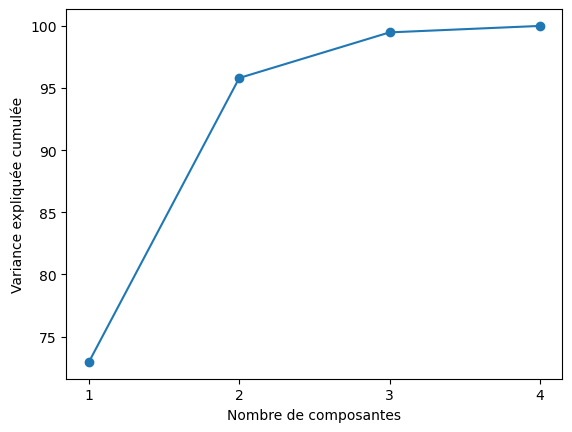

In [25]:
# Calcul de la variance expliquée et de la variance expliquée cumulée
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

# Affichage de la variance expliquée et de la variance expliquée cumulée
print('Variance expliquée: {}'.format(explained_variance))
print('Variance expliquée cumulée: {}'.format(cum_explained_variance))

# Tracé de la variance expliquée cumulée
plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

### Étape 6: Projection des données
<a id="etape-6-projeter-les-donnees"></a>
Enfin, nous pouvons transformer les données  X  via la matrice de projection  W  pour obtenir un sous-espace de caractéristiques de dimension  k .

#### Relation mathématique :

La projection des données dans le nouvel espace de caractéristiques est donnée par la formule suivante :

$$ X_{\text{proj}} = X_{\text{std}} \cdot W^T $$

Où:
- $ X_{\text{proj}} $ est la matrice des données projetées dans le nouvel espace de caractéristiques.
- $ X_{\text{std}} $ est la matrice des données standardisées.
- $ W^T $ est la transposée de la matrice de projection.


(150, 2)


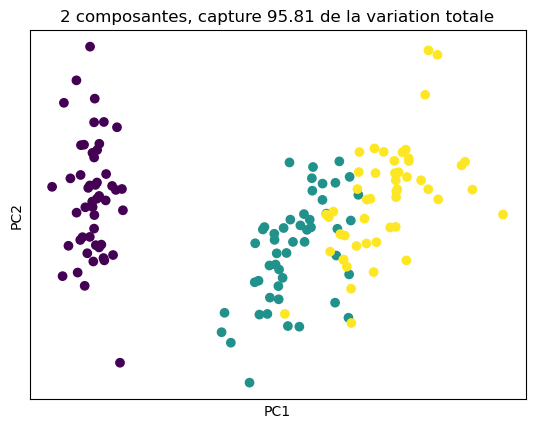

In [26]:
# Transformation des données dans le nouvel espace de caractéristiques
X_proj = X_std.dot(W.T)

print(X_proj.shape)

# Visualisation des données transformées dans l'espace PCA des deux premières CP : CP1 et CP2
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 composantes, capture {} de la variation totale'.format(cum_explained_variance[1]))
plt.show()

### PCA avec Scikit-Learn
<a id="pca-avec-scikit-learn"></a>
Dans cette section, nous effectuons une Analyse en Composantes Principales (PCA) à l'aide du package Scikit-Learn, comme suit :


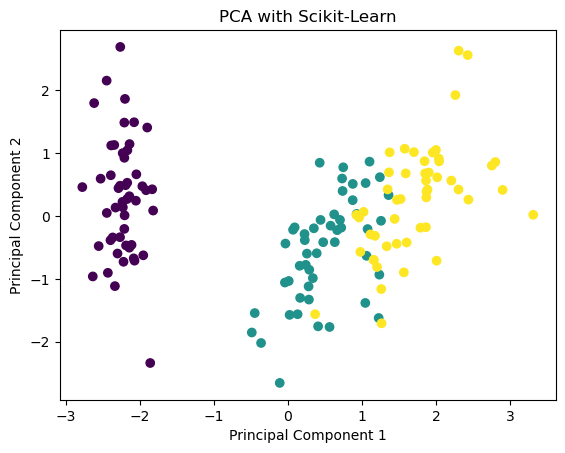

Explained variance ratio: [0.72962445 0.22850762]


In [27]:
# Import des modules nécessaires
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardiser les données
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

# Instancier PCA avec le nombre de composantes désiré
pca = PCA(n_components=2)  

# Adapter PCA aux données standardisées
pca.fit(X_scaled)  # Apprentissage des composantes principales à partir des données standardisées

# Transformer les données dans le nouvel espace de caractéristiques
X_pca = pca.transform(X_scaled) 

# Visualiser les données transformées
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.title('PCA avec Scikit-Learn') 
plt.show() 

# Variance expliquée par chaque composante principale
print('Explained variance ratio:', pca.explained_variance_ratio_)  # Affichage du ratio de variance expliquée par chaque composante principale

### 7. Conclusion
<a id="conclusion"></a>
Dans cette étude, nous avons exploré l'Analyse en Composantes Principales (PCA), une technique puissante de réduction de dimensionnalité. Nous avons utilisé à la fois une implémentation à partir de zéro et l'implémentation fournie par la bibliothèque Scikit-Learn.

La PCA nous a permis de projeter les données dans un nouvel espace de caractéristiques, en préservant autant que possible la variance des données d'origine. Nous avons également examiné l'utilisation des valeurs propres et des vecteurs propres pour extraire les directions principales des données.


### 8. Références
<a id="references"></a>
Pour approfondir vos connaissances sur ce sujet, nous vous recommandons de consulter les références suivantes :

- [Documentation Scikit-Learn sur PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- Jolliffe, I.T. (2002). Principal Component Analysis. Springer.
